In [1]:
from numpy import mean 
from numpy import std 
from sklearn.datasets import make_classification 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.ensemble import BaggingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from matplotlib import pyplot 

# Bagging 

In [2]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, 
random_state=5) 
model = BaggingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise') 
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) 

Accuracy: 0.854 (0.039)


# Boosting

In [3]:
from sklearn.ensemble import GradientBoostingClassifier 
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, 
random_state=7) 
model = GradientBoostingClassifier() 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) 
def evaluate_model(model, X, y): 
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise') 
 return scores 

Mean Accuracy: 0.899 (0.031)


# Stacking

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>decisiontree 0.820 (0.046)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)


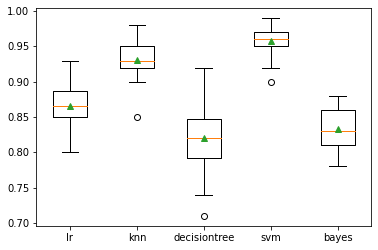

In [4]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, 
random_state=1) 
models = dict() 
models['lr'] = LogisticRegression() 
models['knn'] = KNeighborsClassifier() 
models['decisiontree'] = DecisionTreeClassifier() 
models['svm'] = SVC() 
models['bayes'] = GaussianNB() 
results, names = list(), list() 
for name, model in models.items(): 
 scores = evaluate_model(model, X, y) 
 results.append(scores) 
 names.append(name) 
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores))) 
pyplot.boxplot(results, labels=names, showmeans=True) 
pyplot.show() 